# Working with PandasAI in Python


1. Download the PandasAI library

In [1]:
#pip install pandasai

2. Generate OpenAI API Key

3. Import Libraries

In [2]:
import pandas as pd
from pandasai import PandasAI
from pandasai.llm.openai import OpenAI

4. Read the Olympics Dataset

In [3]:
df = pd.read_csv(r"C:\Users\prathamesh\Downloads\athlete_events.csv")
df.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


5. Loading the API token to OpenAI environment

In [4]:
llm = OpenAI(api_token='Your API Key')

6. Initializing an instance of PandasAI with OpenAI environment

In [5]:
pandas_ai = PandasAI(llm)

7. Talk to Your Dataset With PandasAI

In [6]:
prompt = "Which athlete appeared in the most olympics years and how many"
pandas_ai.run(df, prompt=prompt)

'The athlete who appeared in the most olympics years is Ian Millar with 10 unique years.\n'

8. Verify if the answer we got is correct?

In [7]:
df.groupby(by='Name')['Year'].nunique().sort_values(ascending=False)

Name
Ian Millar                         10
Hubert Raudaschl                    9
Afanasijs Kuzmins                   9
Lesley Allison Thompson-Willie      8
Nino Salukvadze (-Machavariani)     8
                                   ..
Imre Szentply                       1
Imre Szell                          1
Imre Szalay                         1
Imre Stori (Schwertz)               1
Karl Hohmann                        1
Name: Year, Length: 134732, dtype: int64

In [8]:
pandas_ai.run(df, prompt="Which athlete has participated in the most number of events and how many")

'The athlete with the most events is Ioannis Theofilakis with 33 events.\n'

In [9]:
pandas_ai.run(df, prompt="Which country has won the highest number of medals and how many")

('United States', 5219)

In [10]:
df.groupby(by='NOC')['Medal'].count().sort_values(ascending=False).reset_index().head(5)

,NOC,Medal
0,USA,5637
1,URS,2503
2,GER,2165
3,GBR,2068
4,FRA,1777


In [11]:
pandas_ai = PandasAI(llm,verbose=True)

In [12]:
pandas_ai.run(df, prompt="generate a dataset with the total number of male and female participants in each year")

,Male,Female
Year,,
1896-01-01,176.0,0.0
1900-01-01,1201.0,23.0
1904-01-01,644.0,6.0
1906-01-01,835.0,6.0
1908-01-01,1980.0,44.0
1912-01-01,2356.0,53.0
1920-01-01,2598.0,78.0
1924-01-01,3396.0,169.0
1928-01-01,3363.0,340.0


9. Plot visual charts of our data

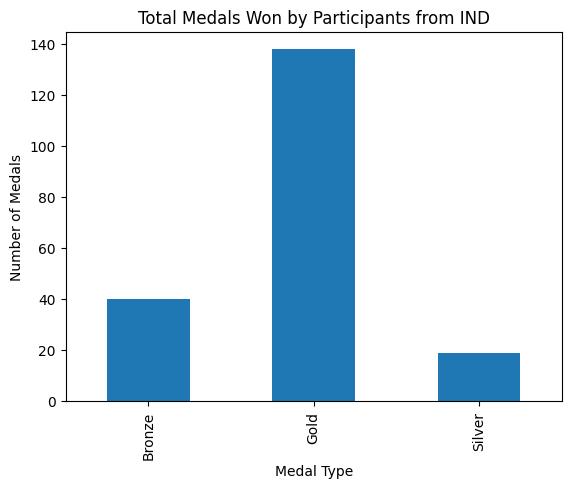

In [13]:
pandas_ai.run(df, prompt="plot a barplot with the total number of medals won by participants from IND")

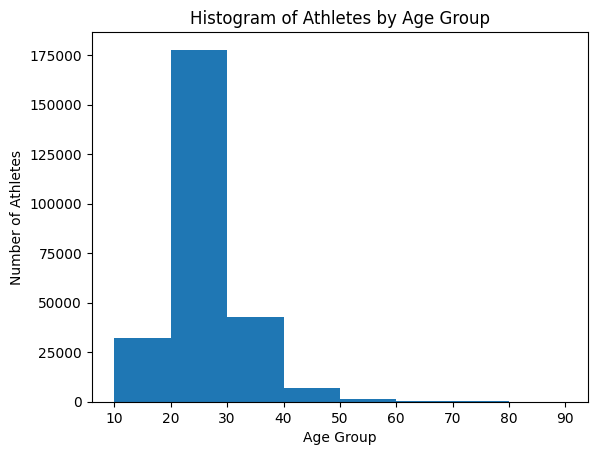

In [14]:
pandas_ai.run(df, prompt="create a histogram for the number of athletes based on the age group. Take bin size of 10")

10. Conclusion: PandasAI serves as a valuable extension to the Pandas library.